<ipython-input-27-00708eb67945>:37: UserWarning: The palette list has more values (24) than needed (4), which may not be intended.
  ax = sns.barplot(x='Type of Humor', y='value', hue='variable', data=df_melted, dodge=True, palette=df_melted['color'].tolist())


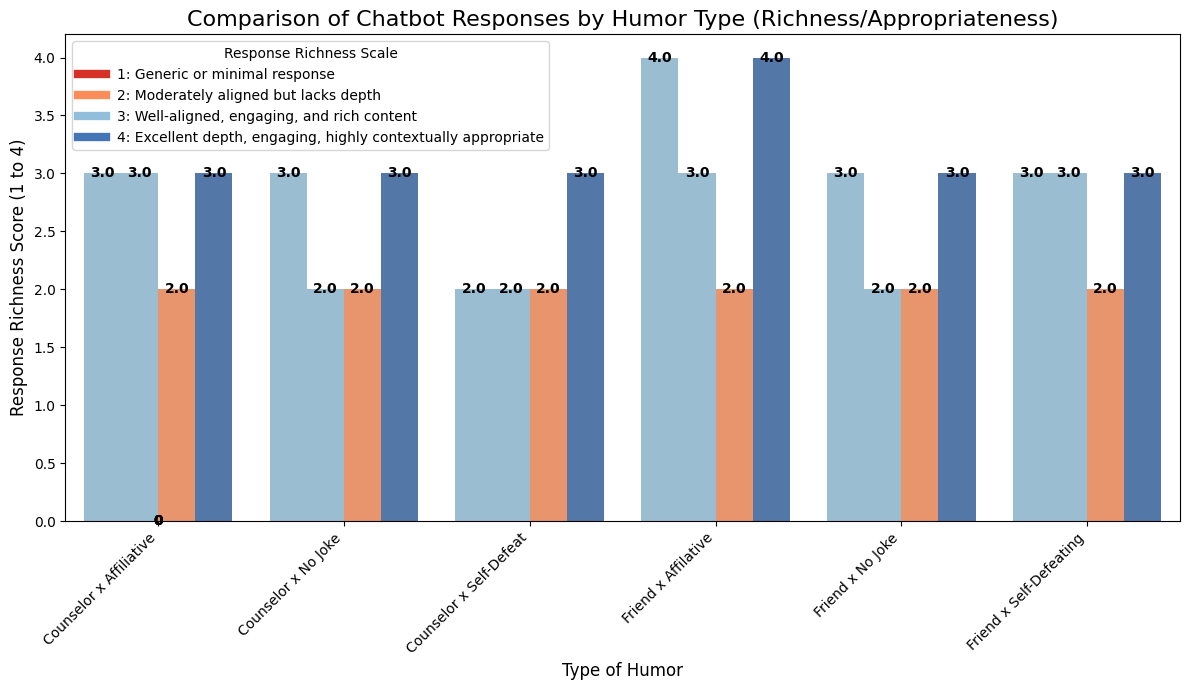

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.lines import Line2D

# Updated data with reassessed numeric scores (1 to 4) for each response based on richness and appropriateness
data = {
    'Type of Humor': ['Counselor x Affiliative', 'Counselor x No Joke', 'Counselor x Self-Defeat',
                      'Friend x Affilative', 'Friend x No Joke', 'Friend x Self-Defeating'],
    'Chat GPT': [3, 3, 2, 4, 3, 3],  # Reassessed scores
    'Meta Llama': [3, 2, 2, 3, 2, 3],
    'Gemini': [2, 2, 2, 2, 2, 2],
    'Humor Chatbots': [3, 3, 3, 4, 3, 3]
}

# Convert to DataFrame for easier handling with Seaborn
df = pd.DataFrame(data)

# Melt the DataFrame for Seaborn compatibility
df_melted = pd.melt(df, id_vars=["Type of Humor"], value_vars=['Chat GPT', 'Meta Llama', 'Gemini', 'Humor Chatbots'])

# Define the color mapping for the score values (1 to 4)
score_color_mapping = {
    1: "#d73027",  # Red (low score)
    2: "#fc8d59",  # Orange
    3: "#91bfdb",  # Light blue
    4: "#4575b4"   # Blue (high score)
}

# Map the numeric scores to colors
df_melted['color'] = df_melted['value'].map(score_color_mapping)

# Create a grouped bar chart with custom colors
plt.figure(figsize=(12, 7))

# Create a grouped barplot
ax = sns.barplot(x='Type of Humor', y='value', hue='variable', data=df_melted, dodge=True, palette=df_melted['color'].tolist())

# Add labels and title for clarity
plt.title('Comparison of Chatbot Responses by Humor Type (Richness/Appropriateness)', fontsize=16)
plt.xlabel('Type of Humor', fontsize=12)
plt.ylabel('Response Richness Score (1 to 4)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels to each bar to indicate the agent and score
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', fontweight='bold')

# Create the legend with numeric score descriptions
score_legend = {
    1: '1: Generic or minimal response',
    2: '2: Moderately aligned but lacks depth',
    3: '3: Well-aligned, engaging, and rich content',
    4: '4: Excellent depth, engaging, highly contextually appropriate'
}

# Create a custom legend based on score values
legend_elements = [Line2D([0], [0], color=score_color_mapping[i], lw=6, label=score_legend[i]) for i in range(1, 5)]

# Add the legend to the plot
plt.legend(handles=legend_elements, title="Response Richness Scale", loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

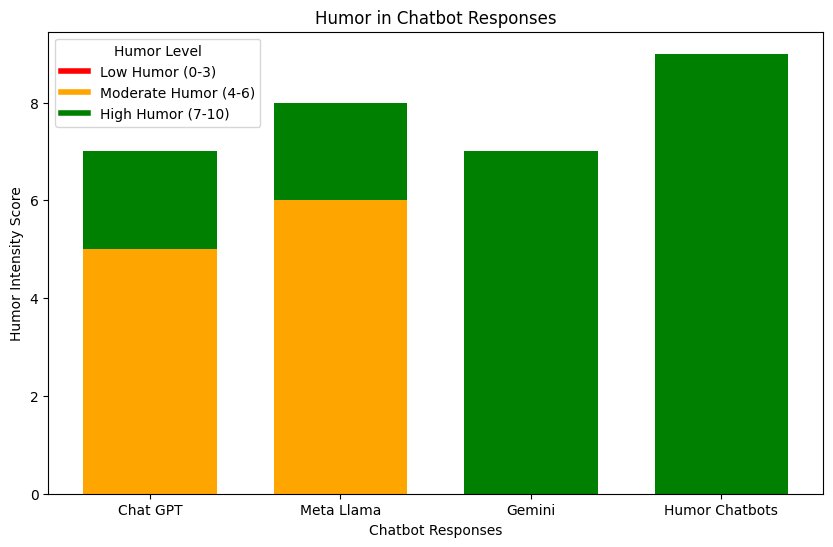

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: Humor scores for each chatbot
chatbot_responses = ['Chat GPT', 'Meta Llama', 'Gemini', 'Humor Chatbots']
responses = {
    'Counselor x Affiliative': [2, 4, 3, 5],
    'Counselor x Disputative': [6, 5, 7, 8],
    'Friend x No Joke': [3, 4, 2, 6],
    'Friend x Affable': [7, 8, 6, 9],
    'Friend x Sarcastic': [5, 6, 7, 8]
}

# Normalize response scores to be in the range 0-10 (or whatever scale you prefer)
color_map = {
    'Low Humor': 'red',       # Scores 0-3
    'Moderate Humor': 'orange',  # Scores 4-6
    'High Humor': 'green'      # Scores 7-10
}

# Determine color for each response based on humor intensity
def get_color(score):
    if score <= 3:
        return 'red'  # Low Humor
    elif score <= 6:
        return 'orange'  # Moderate Humor
    else:
        return 'green'  # High Humor

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each context and chatbot
width = 0.7  # Width of bars
for i, (context, scores) in enumerate(responses.items()):
    # Apply color based on score for each bar
    for j, score in enumerate(scores):
        ax.bar(chatbot_responses[j], score, width, label=context if j == 0 else "", color=get_color(score))

# Customizing the chart
ax.set_xlabel('Chatbot Responses')
ax.set_ylabel('Humor Intensity Score')
ax.set_title('Humor in Chatbot Responses')

# Add legend with humor levels
handles = [
    plt.Line2D([0], [0], color='red', lw=4),   # Low Humor
    plt.Line2D([0], [0], color='orange', lw=4), # Moderate Humor
    plt.Line2D([0], [0], color='green', lw=4)   # High Humor
]
labels = ['Low Humor (0-3)', 'Moderate Humor (4-6)', 'High Humor (7-10)']
ax.legend(handles, labels, title="Humor Level")

# Display the plot
plt.show()